# Assignment 2. Diabetes Diagnosis

The assignment is to develop a classifier diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.

The datasets consists of several medical predictor variables and one target variable, `Outcome`. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

Can you build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

First, let's load the data. The file named `diabetes_train.csv` is located in the same folder.

In [1]:
import pandas as pd

df = pd.read_csv('diabetes_train.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
693,7,129,68,49,125,38.5,0.439,43,1
694,2,90,60,0,0,23.5,0.191,25,0
695,7,142,90,24,480,30.4,0.128,43,1
696,3,169,74,19,125,29.9,0.268,31,1


Define `X` and `y`. Here, `X` and `y` refers to the input and output of our classification models.

In [2]:
X = df.iloc[:, :-1] # or, df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df.iloc[:, -1]  # or, df['Outcome']

## Problem 1. Check the ratio of positive samples

Check the ratio of positive samples? (here, positive means the target variable `Outcome==1`)

- Hint: Check the number of all samples ans positive samples.

In [3]:
# your code here
# ...
print(X.shape)
print(y.shape)
print("The ratio of positive smaple is", round(y.sum() / len(y),2))    # y값들 중 1인 값들의 합 / y 샘플의 총 개수   ->   positve(1)인 애들의 비율이 나온다

(698, 8)
(698,)
The ratio of positive smaple is 0.35


## Problem 2. Train Classifiers

First, split the data into training and validation data. This is necessary to avoid overfitting. When spliting data, apply `stratify` option (why?).

In [4]:
from sklearn.model_selection import train_test_split

X_trn, X_val, y_trn, y_val = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

Apply feature normalization so that all features are considered equal.

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_trn)
X_trn_norm = scaler.transform(X_trn)
X_val_norm = scaler.transform(X_val)

Train decision tree, random forest, and logistic regression using the normalized training data. And check the training and validation performances of the model (e.g., accuracy, fscore, ...).

In [6]:
# your code here
# ...
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

clf_dt = DecisionTreeClassifier(max_depth=3)
clf_dt.fit(X_trn, y_trn)

clf_nb = GaussianNB()
clf_nb.fit(X_trn, y_trn)

clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_knn.fit(X_trn_norm, y_trn)

clf_lr = LogisticRegression()
clf_lr.fit(X_trn_norm, y_trn)

clf_rf = RandomForestClassifier()
clf_rf.fit(X_trn, y_trn)

print("trainning finished.")

trainning finished.


In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    fscore = f1_score(y_true, y_pred)
    print('Accuracy: {:.2f}%'.format(accuracy*100))
    print('Precision: {:.2f}%'.format(precision*100))
    print('Recall: {:.2f}%'.format(recall*100))
    print('Fscore: {:.2f}%'.format(fscore*100))

In [8]:
for clf, name in zip(
    [clf_dt, clf_knn, clf_nb, clf_lr, clf_rf],
    ['Decision Tree', 'k-NN', 'Naive Bayes', 'Logistic Regression', 'Random Forest']
) :
    if name in ['k-NN', 'Logistic Regression']:
        y_val_pred = clf.predict(X_val_norm)
    else:
        y_val_pred = clf.predict(X_val)
    print('Model: {}'.format(name))
    evaluate(y_val, y_val_pred)
    print()

Model: Decision Tree
Accuracy: 68.10%
Precision: 56.82%
Recall: 34.25%
Fscore: 42.74%

Model: k-NN
Accuracy: 73.33%
Precision: 66.04%
Recall: 47.95%
Fscore: 55.56%

Model: Naive Bayes
Accuracy: 69.52%
Precision: 58.49%
Recall: 42.47%
Fscore: 49.21%

Model: Logistic Regression
Accuracy: 72.38%
Precision: 66.67%
Recall: 41.10%
Fscore: 50.85%

Model: Random Forest
Accuracy: 70.95%
Precision: 63.04%
Recall: 39.73%
Fscore: 48.74%



## Problem 3. Feature importance

Remember that logistic regression, decision tree, and random forest provide information about which feature is important to predict the outcome.

In our problem of diabetes diagnosis, which feature is important? explore the model and describe your opinion.

다섯가지 모델 중 정확도가 가장 높은 모델은 Random Forest가 73.81%로 가장 높았다. k-NN과 Logistic Regression이 각각 73.33%, 72.38%로 그 뒤를 이었다. Precision과 Recall의 조화평균인 F1score는 k-NN(55.56%), Random Forest(54.55%), Logistic Regression(50.85%) 순으로 높았다. 이러한 결과를 비추어봤을 때, 가장 잘 작동하는 모델은 k-NN 또는 Random Forest라고 할 수 있다.

## Problem 4. Check model performance on new data (test performance)

Today, 70 new patients arrived in our hospital, so you want to check your model performance on new samples.
The labels of new instances were obtained by diagnosis of experienced doctors.

The test data named `diabetes_test.csv` is located in the same forder.

In [ ]:
df_test = pd.read_csv('diabetes_test.csv')
df_test

Define `X` and `y` of test data.

In [ ]:
X_test = df_test.iloc[:, :-1]
y_test = df_test.iloc[:, -1]

Test your classifiers on the test data and draw a plot containing ROC curves and AUC scores of the models obtained in the Problem 2.
* (warning) Don't forget normalization using `scaler` before inputting your data into the model. Or, your results may be not good...
* Use `plt.savefig('roc.png')` to save the plot to the file named `roc.png`.

C:\Users\01wkd\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


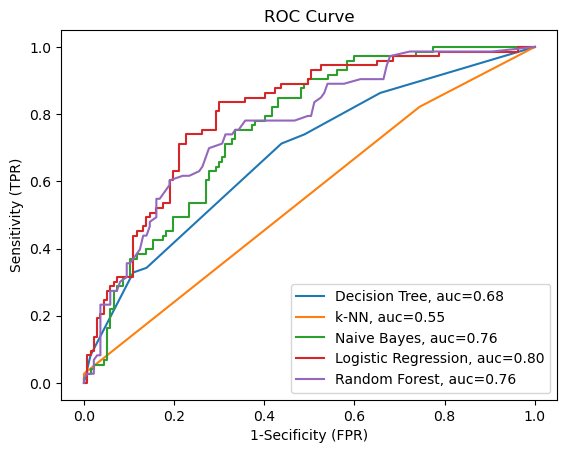

In [11]:
# your code here
# ...
import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, roc_auc_score

for clf, name in zip(
    [clf_dt, clf_knn, clf_nb, clf_lr, clf_rf],
    ['Decision Tree', 'k-NN', 'Naive Bayes', 'Logistic Regression', 'Random Forest']
):
    
    if  name in ['k_nn', 'Logistic Regression']:
        y_val_pred_proba = clf.predict_proba(X_val_norm)[:, 1]
    else:
        y_val_pred_proba = clf.predict_proba(X_val)[:, 1]
    
    
    fpr, tpr, _ = roc_curve(y_val, y_val_pred_proba)
    
    auc = roc_auc_score(y_val,y_val_pred_proba)
    
    plt.plot(fpr, tpr, label = "{}, auc={:.2f}".format(name, auc))
    
plt.legend(loc=4)
plt.xlabel('1-Secificity (FPR)')
plt.ylabel('Sensitivity (TPR)')
plt.title('ROC Curve')
plt.show()